# Project on "powerproduction" dataset
### Loading the file
First import python packages. Next read in the csv which is saved in the same sub directory as the Jupyter Notebok file allowing the file path to be straight forward. Create the dfpower dataframe from the csv. 

In [1]:
# Import packages required for computation and visualisation. Also matplotlib magic command
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dfpower = pd.read_csv('powerproduction.csv')

#### Checking the data
Check the file loaded ok using df.head( ) to view the first 5 (default) rows and df.tail( ) to view the last 5 rows. The amount of rows shown can be shown by inserting a number inside the brackets.

In [2]:
dfpower.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [3]:
dfpower.tail()

,speed,power
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


#### Check for non zero 'power' values
The head and tail functions both returned 0.0 "power" values. We can use the command df.iloc[ ] to view row index values in the middle of the dataset to ensure power has some non zero values. 

In [4]:
dfpower.iloc[200:205]

,speed,power
200,10.185,22.305
201,10.210,20.704
202,10.235,30.341
203,10.260,24.293
204,10.285,20.636


#### Summary of the dataset
df.describe( ) is a very handy function to display important summary statistics about the dataset.

In [5]:
dfpower.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


### Data Visualisation
Data visualisation is very useful to understand the data. 

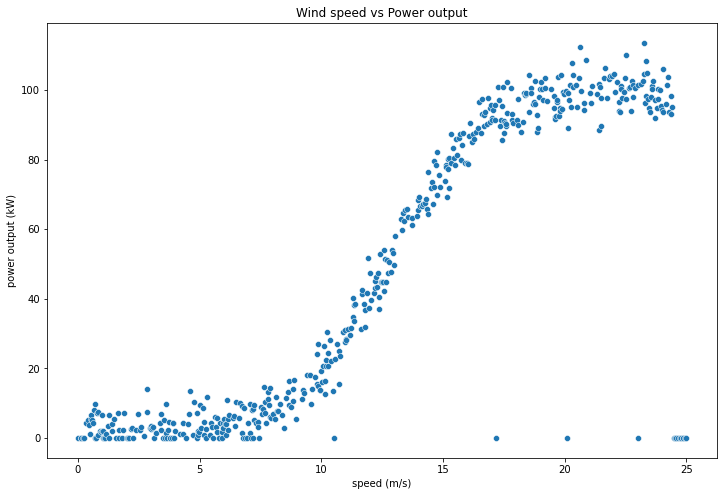

In [6]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=dfpower, x='speed', y='power')
plt.xlabel('speed (m/s)')
plt.ylabel('power output (kW)')
plt.title("Wind speed vs Power output")
plt.show();

### Linear Regression
Linear regression is the method of fitting a linear equation to the relationship between two variables in observed data. One variable is considered to be an explanatory variable otherwise known as an independent variable, and the other is considered to be a dependent variable. Simple linear regression is the case where only one explanatory variable exists i.e. one independent variable and one dependent variable. A common example is relating height and weight of individuals. A linear regression line can be written mathematically as the equation $Y = mX + c$, where $X$ is the independent variable and $Y$ is the dependent variable. The slope of the line is $m$, and $c$ is the intercept (the value of $y$ when $x = 0$). [1]

#### Fitting a line to  "powerproduction" dataset
From the scatter plot above it is apparent that a line of best fit would be reasonable suitable for at least the middle third of the plot however the left and right thirds of the plot appear to be more curved. 

### Use Numpy to calculate the coefficients of the line (m and c)
First convert the dataframe columns to numpy arrays using the pandas .to_numpy() function. 

In [7]:
# Pandas function .to_numpy to create numpy array for each column
speed = dfpower['speed'].to_numpy()
power = dfpower['power'].to_numpy()
print(type(speed))
print(type(power))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
# use numpy.polyfit to get the coefficients of the line of best fit
m = np.polyfit(speed, power, 1)[0]
c = np.polyfit(speed, power, 1)[1]
print(f'm(slope): {m:.3f}    c(intercept): {c:.3f}')

m(slope): 4.918    c(intercept): -13.900


#### Plotting best fit line
Plot the best fit line on top of the original data

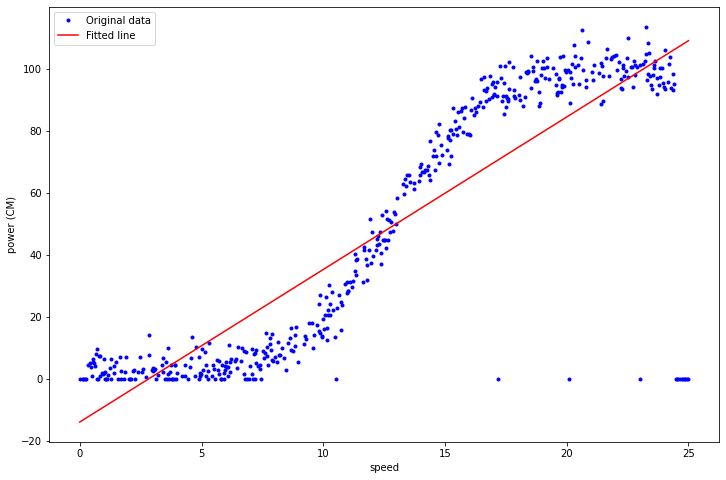

In [9]:
# Plot the best fit line.
plt.figure(figsize=(12,8))
plt.plot(speed, power, '.b', label='Original data')
plt.plot(speed, m * speed + c, 'r-', label='Fitted line')

# Add axis labels and a legend.
plt.xlabel('speed')
plt.ylabel('power (CM)')
plt.legend()

# Show the plot.
plt.show();

#### Calculating Pearson's r value and R-squared value using Numpy
**Pearson's correlation coefficient (r)** is a statistic that measures linear correlation between two variables. Denoted a value between -1 and +1, A value of +1 is a total positive linear correlation; 0 being no linear correlation; and -1 being a total negative correlation.[2]  
**R-squared** is the proportion of the variance in the dependent variable that is predictable from the independent variable.[3]

In [10]:
# calculate both pearson's "r" and R-squared using Numpy
print(f'Pearson\'s correlation coefficient (r): {np.corrcoef(speed, power)[0,1]:5.2f}')
print(f'R-squared value: {np.corrcoef(speed, power)[0,1]**2:27.2f}')

Pearson's correlation coefficient (r):  0.85
R-squared value:                        0.73


### Use Scikit-Learn to perform Linear Regression
From the official Scikit-Learn website [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) "LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation."  
First the X and y variables are defined.

In [11]:
# create the variables. X must be a 2d array and y must be a 1d array
X = speed.reshape(-1,1)
y = power

#### Splitting the data into "Train" and "Test" sets with Scikit Learn train_test_split( )

In [12]:
# split the data into training and test sets using sklear test_train_split function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

#### Training the LinearRegression Algorithm

In [13]:
# import LinearRegression class from sklearn
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

# call the fit function
reg.fit(X_train, y_train)

LinearRegression()

#### Print out the calculated coefficients for Intercept and Slope

In [14]:
print(f'm(slope): {reg.coef_[0]:.3f}    c(intercept): {reg.intercept_:.3f}')

m(slope): 4.855    c(intercept): -13.281


#### Print R-Squared and Pearson's correlation coefficient

In [15]:
# Pearson's r is the sqrt of R-Squared which sklearn returns as score()
r_square = reg.score(X,y)
print(f'Pearson\'s correlation coefficient (r): {np.sqrt(r_square):.2f}')
print(f'R-squared value: {r_square:26.2f}')

Pearson's correlation coefficient (r): 0.85
R-squared value:                       0.73


#### Predicting "y" values
Now that the algorithm has been changed and the coefficients etc are calculated, values can be predicted. To do this, the test data will be used to see how accurately our algorithm predicts values for power output when given the wind speed.

In [16]:
# use predict() function with X_test set
y_pred = reg.predict(X_test)

In [17]:
# Create a new data from of actual vc predicted values to compare
dfcomp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfcomp

,Actual,Predicted
0,9.890,4.336186
1,3.373,-7.208075
2,100.311,101.282738
3,91.206,71.028812
4,14.131,0.569009
...,...,...
95,104.655,99.578770
96,8.471,23.652678
97,7.245,24.016773
98,3.578,1.297201


#### Plotting best fit line
Plot the best fit line on top of the original data

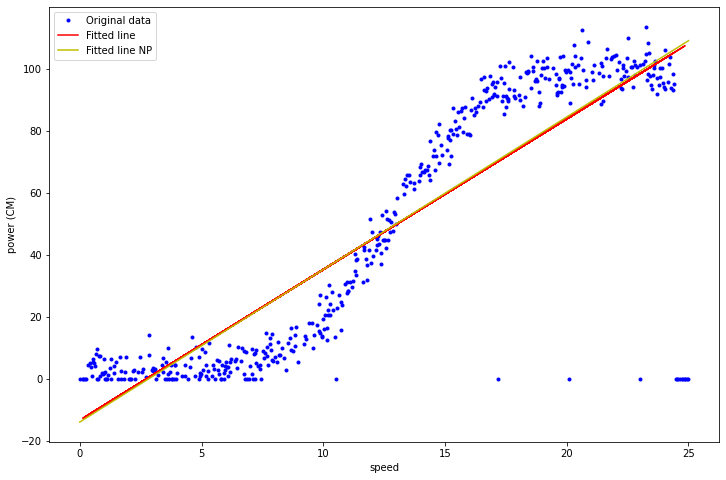

In [18]:
# Plot the original data vs sklearn best fit line.
plt.figure(figsize=(12,8))
plt.plot(speed, power, '.b', label='Original data')
plt.plot(X_test, y_pred, 'r-', label='Fitted line')
# Numpy best line
plt.plot(speed, m * speed + c, 'y-', label='Fitted line NP')

# Add axis labels and a legend.
plt.xlabel('speed')
plt.ylabel('power (CM)')
plt.legend()

# Show the plot.
plt.show();

#### Evaluate the Accuracy of the Algorithm

In [19]:
# print the 3 common evaluation metrics. MAE, MSE, RMSE
from sklearn import metrics
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred): 12.4f}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred): 14.4f}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)): .4f}')

Mean Absolute Error:      13.5093
Mean Squared Error:       322.8440
Root Mean Squared Error:  17.9679


### References
[1] Linear Regression; [Stat.yale.edu](http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm#:~:text=Linear%20regression%20attempts%20to%20model,linear%20equation%20to%20observed%20data.&text=A%20linear%20regression%20line%20has,Y%20is%20the%20dependent%20variable.)<br />
[2] Pearson correlation coefficient; [Wikipedia.org](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)<br />
[3] Coefficient of determination (R-squared); [Wikipedia.org](https://en.wikipedia.org/wiki/Coefficient_of_determination)<br />


Links
https://towardsdatascience.com/basic-curve-fitting-of-scientific-data-with-python-9592244a2509  
https://stackabuse.com/linear-regression-in-python-with-scikit-learn/  
https://stackabuse.com/linear-regression-in-python-with-scikit-learn/